**Name:** <span style="color:red">Melitza Hesseling, Alessandro Giulivo</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 6
# Network percolation

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to `practical9_name1_name2.ipynb`, where `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study the percolation transition in random networks. To that end we will use the Python package `NetworkX`.

In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import networkx as nx

First, use the **NetworkX** function `erdos_renyi_graph` to generate an Erdös-Renyi random network with $n=10000$ nodes and connection probability $p=0.0005$. Plot the degree distribution.

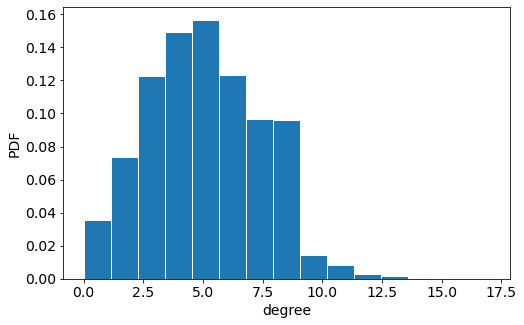

In [2]:
n = 10000
p = 0.0005
G_random = nx.erdos_renyi_graph(n,p)
degrees = []
for (node, degree) in G_random.degree():
    degrees.append(degree)

    
plt.figure(figsize=(8,5))
plt.rc('font', size=14)
plt.hist(degrees, bins = 15, density=True, edgecolor='white')
plt.xlabel('degree')
plt.ylabel('PDF')
plt.show()

---

<span style="color:blue">The histogram shows the degree distribution for a random network. It is clearly different from the degree distribution of a scale-free network. In this case, most nodes have a degree that does not deviate muchg from the mean degree, unlike in a scale-free network, where most nodes have a very low degree and only a few nodes have a very large degree.  
In the next graph we will demonstrate that the histogram corresponds to a Poisson distribution.</span>

---

Verify that the degree distribution obtained above matches a Poisson distribution with mean equal to the average degree of the network.

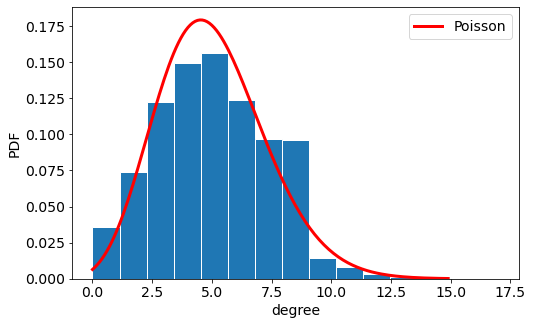

In [3]:
c = 2*G_random.number_of_edges()/G_random.number_of_nodes()
k_vec = np.arange(0, 15, 0.1)
P_k = c**k_vec/(factorial(k_vec))*np.exp(-c)

plt.figure(figsize=(8,5))
plt.rc('font', size=14)
plt.hist(degrees, bins = 15, density=True, edgecolor='white')
plt.plot(k_vec, P_k, color="red", linewidth=3, label="Poisson")
plt.xlabel('degree')
plt.ylabel('PDF')
plt.legend()
plt.show()

We will now study the percolation transition discussed in class. To that end, generate an ensemble of Erdös-Renyi networks (e.g. 100 networks) with 1000 nodes each. Compute for each network the fraction of nodes that belong to the largest connected component, and calculate its average over the ensemble of networks with a given connection probability $p$. Repeat this calculation for a range of values of $p$ between $0$ and $10/n$, with $n$ being the number of nodes of the network.

In [4]:
n = 1000
num_networks = 100
p_vec = np.arange(0, 10/n, 0.0005)
s_vec = np.empty(len(p_vec))

for i in range(len(p_vec)):
    fraction_nodes = 0
    for j in range(num_networks):
        G_random = nx.erdos_renyi_graph(n,p_vec[i])
        nodes_largest = len(max(nx.connected_components(G_random)))
        fraction_nodes += nodes_largest/n
    s_vec[i] = fraction_nodes/num_networks

Finally, plot the transition curve.

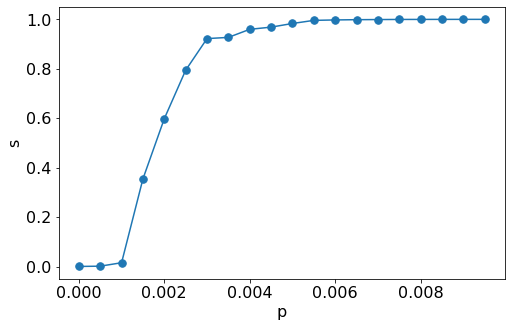

In [5]:
plt.figure(figsize=(8,5))
plt.rc('font', size=16)
plt.plot(p_vec, s_vec,".", markersize=15)
plt.plot(p_vec, s_vec, color="tab:blue")
plt.xlabel('p')
plt.ylabel('s')
plt.show()

---

<span style="color:blue">In this plot we can see that at a low value of $p$ (connection probability) there are many connected components where the largest one is only a very small fraction of the total network. As $p$ increases, some of these connected components will merge, so the number of connected components will decrease, and their size will increase.  
Around a certain value of $p$, the largest connected component will start increasing in size very rapidly until it becomes the vast majority of the network. This transition is called the $percolation$ $transition$. For example in our case, this transition happens at $p = 0.0015$</span>

---